# Trabajo Práctico Nº 1
## Objetivos

- Implementar y analizar el filtro de promedio móvil (moving average) en Python.
- Aplicar el concepto de convolución en señales digitales.
- Familiarizarse con el entorno de desarrollo en Python notebooks.
- Comparar representación en punto flotante vs punto fijo, evaluando precisión y tiempos de cómputo.

# Ejercicio 1 - Filtro Moving Average

1. Implementá un algoritmo de promedio móvil (moving average) según la definición vista en clase, que reciba como parámetros:

- La señal de entrada.
- El tamaño de la ventana.

A partir de tu implementación, obtené y graficá la respuesta impulsiva del sistema (lo que en clase llamamos su “firma” o función de transferencia).

2. Respondé:

- ¿Cómo se obtiene la respuesta impulsiva de cualquier sistema?
- ¿Qué representa en el caso del filtro de promedio móvil?

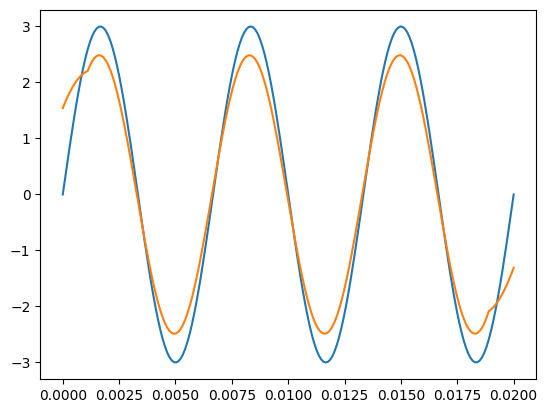

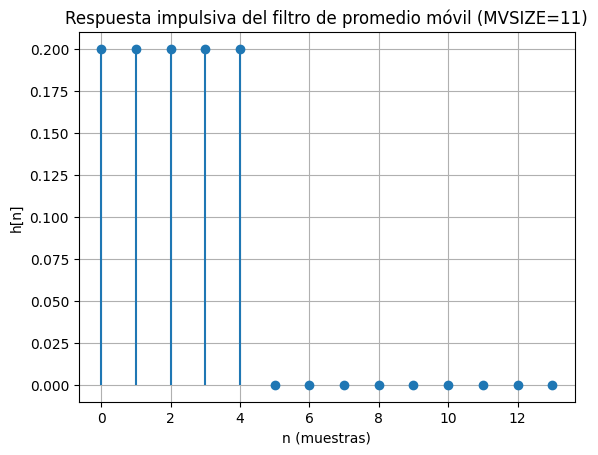

In [25]:
# Escribí tu código acáLa respuesta impulsiva 
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft

# Se ingresan los parametros de la señal de entrada a suavizar y se grafica

Fs = 10000   # Sampling Freq 10KHz
N = 200      # Samples number
t = np.linspace(0,N/Fs,num=N) # Crea una variable de tiempo desde 0, con intervalos de 1/Fs

f1 = 150   # 100Hz
A1 = 3

signal = A1 * np.sin(2*np.pi*f1*t)
plt.plot(t,signal)

# Se crea el filtro moving average y se aplica a la señal anterior y se grafica

MVSIZE = 11 # Tamaño de la ventana
avg = np.zeros(N)
for n in range(len(signal)):
    suma = 0
    d = 0
    for k in range (-(MVSIZE), MVSIZE):
        if ((n-k) > 0) and ((n-k) < (len(signal))):
            suma = suma + signal[(n-k)]
            d = d+1
    avg[n] = np.copy(suma/d)
plt.plot(t,avg)
   
# Creo una señal impulso unitario δ[n]
N_impulso = 10 
impulso = np.zeros(N_impulso)
impulso[0] = 1   # δ[n]


# Aplico el filtro a la señal impulso

respuesta_impulsiva = np.convolve(impulso, h)

# Grafico la respuesta impulsiva del filtro

plt.figure()
plt.stem(respuesta_impulsiva, basefmt=" ")
plt.title(f"Respuesta impulsiva del filtro de promedio móvil (MVSIZE={MVSIZE})")
plt.xlabel("n (muestras)")
plt.ylabel("h[n]")
plt.grid(True)
plt.show()

"""
Respondé:
¿Cómo se obtiene la respuesta impulsiva de cualquier sistema?
¿Qué representa en el caso del filtro de promedio móvil?

La respuesta impulsiva se obtiene aplicando al sistema una señal impulso unitario como entrada, esto se debe a que el 
impulso unitario contiene toda la información de respuesta del sistema lineal e invariante en el tiempo (LTI), y permite 
describir completamente su comportamiento, tambien llamada su firma.

Representa que el filtro “promedia” las últimas 𝑁 muestras, dándole a cada una el mismo peso. Por lo tanto, suaviza la 
señal de entrada, cumpliria la funcion de un filtro pasa-bajos, ya que atenúa las variaciones rápidas (frecuencias altas).
"""

# Ejercicio 2 - Respuesta del sistema

1. Genera dos señales de prueba:
    - Una onda cuadrada de amplitud 1 y frecuencia de 2 kHz.
    - Una onda triangular de amplitud 1 y frecuencia de 1 kHz.

Aplica el moving average implementado en el Ejercicio 1 a estas señales.

2. Analiza los resultados:

    - Grafica la señal original y la señal filtrada.
    - Explica qué cambios observas en la forma de onda.

3. Escribe tus conclusiones: ¿qué efecto tiene el filtro de promedio móvil sobre cada señal?


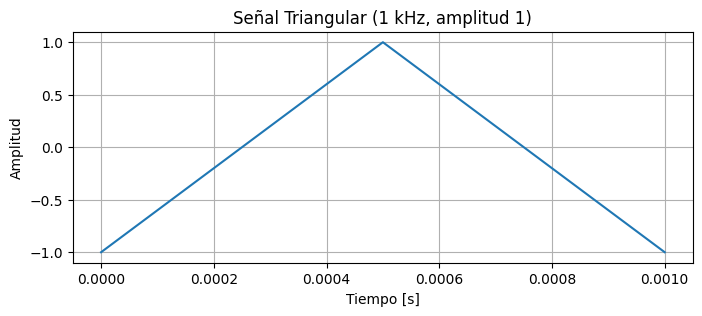

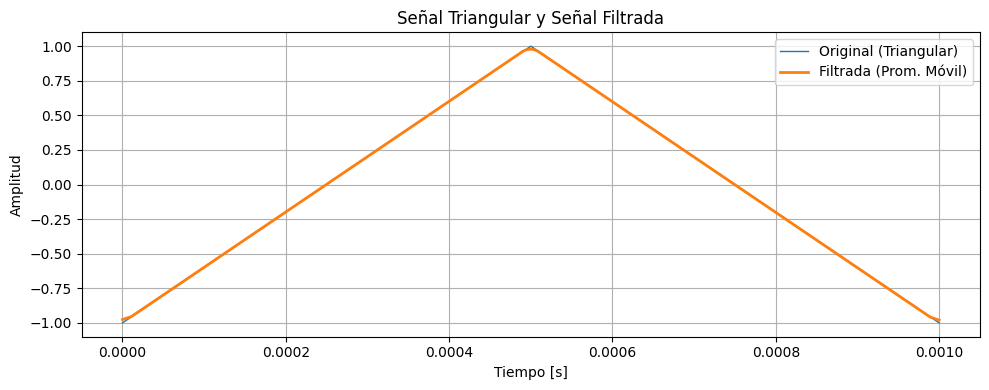

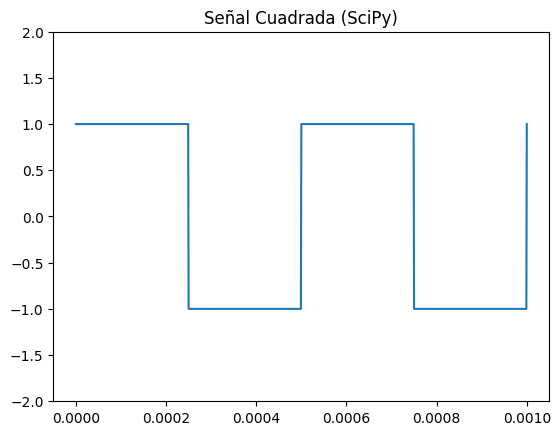

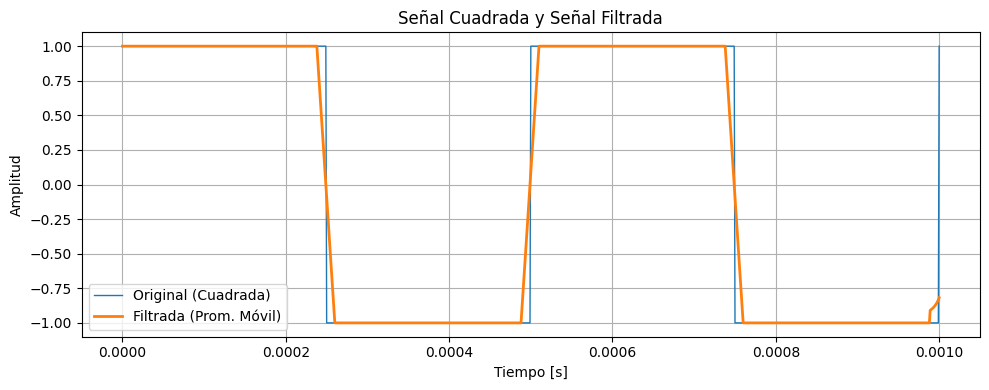

In [44]:
# Escribí tu código acá
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt


# Señal Triangular con Scipy
frec_triangular = 1000        # frecuencia de la señal triangular (Hz)
f_muestreo = 1000000            # frecuencia de muestreo (Hz)
t = np.arange(0, 1e-3, 1/f_muestreo)  # 1 ms de señal
sen_triangular = sig.sawtooth(2 * np.pi * frec_triangular * t, width=0.5)
plt.figure(figsize=(8,3))
plt.plot(t, sen_triangular)
plt.title('Señal Triangular (1 kHz, amplitud 1)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

MVSIZE = 11 # Tamaño de la ventana
avg = np.zeros(len(sen_triangular))
for n in range(len(sen_triangular)):
    suma = 0
    d = 0
    for k in range (-(MVSIZE), MVSIZE):
        if ((n-k) > 0) and ((n-k) < (len(sen_triangular))):
            suma = suma + sen_triangular[(n-k)]
            d = d+1
    avg[n] = np.copy(suma/d)
plt.figure(figsize=(10, 4))
plt.plot(t, sen_triangular, label='Original (Triangular)', linewidth=1)
plt.plot(t, avg, label='Filtrada (Prom. Móvil)', linewidth=2)
plt.title('Señal Triangular y Señal Filtrada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Señal Cuadrada con Scipy
frec_cuadrada = 2000          # frecuencia de la señal cuadrada (Hz)
f_muestreo = 1000000            # frecuencia de muestreo (Hz)
t = np.arange(0, 1e-3, 1/f_muestreo)  # 1 ms de señal
sen_cuadrada = sig.square(2 * np.pi * frec_cuadrada * t)

plt.title('Señal Cuadrada (SciPy)')
plt.plot(t, sen_cuadrada)
plt.ylim(-2, 2)
plt.show()

MVSIZE = 11 # Tamaño de la ventana
avg = np.zeros(len(sen_cuadrada))
for n in range(len(sen_cuadrada)):
    suma = 0
    d = 0
    for k in range (-(MVSIZE), MVSIZE):
        if ((n-k) > 0) and ((n-k) < (len(sen_cuadrada))):
            suma = suma + sen_cuadrada[(n-k)]
            d = d+1
    avg[n] = np.copy(suma/d)
plt.figure(figsize=(10, 4))
plt.plot(t, sen_cuadrada, label='Original (Cuadrada)', linewidth=1)
plt.plot(t, avg, label='Filtrada (Prom. Móvil)', linewidth=2)
plt.title('Señal Cuadrada y Señal Filtrada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

"""
Analiza los resultados:

Grafica la señal original y la señal filtrada.
Explica qué cambios observas en la forma de onda.
Escribe tus conclusiones: ¿qué efecto tiene el filtro de promedio móvil sobre cada señal?

Los cambios que se observan en las formas de onda son en los cambios abruptos de ambas señales suavizando dichos tramos.
En la señal triangular son los picos los que se suavizan perdiendo esaa forma punteaguda y en la señal cuadrada en los cambios
abruptos ya que son los contenidos de alta frecuencia que como el filtro funicona como un pasa bajo suaviza dichos bordes
atenuando esos cambios

"""

# Ejercicio 3 - Convolución en punto flotante y punto fijo

1. Implementa un algoritmo de convolución:

    - En punto flotante (float).
    - En punto fijo, utilizando por ejemplo la librería fixedpoint.

2. Compara los resultados con la función de NumPy np.convolve. Mide y compara:

    - El tiempo de ejecución usando timeit.
    - El error de la salida respecto al cálculo en punto flotante.

3. Conclusión:

    - ¿Qué diferencias observas entre las implementaciones?
    - ¿Qué ventajas y desventajas tiene usar punto fijo en lugar de punto flotante?

In [8]:
# Escribí tu código acá
import numpy as np
import timeit
from fixedpoint import FixedPoint

# Señal de entrada (ruido blanco)
np.random.seed(0)
x = np.random.uniform(-1, 1, 1000)  # Señal de prueba

# Kernel de convolución
kernel_size = 16
kernel1 = np.ones(kernel_size)/kernel_size

# Convolucion de punto flotante
def conv_float(x, kernel1):
    N = len(x)
    M = len(kernel1)
    y = np.zeros(N + M - 1)
    for n in range(len(y)):
        for k in range(M):
            if 0 <= n - k < N:
                y[n] += x[n - k] * kernel1[k]
    return y

# Convolucion de punto fijo con FixedPoint
def to_fixed(val, m=1, n=15):
    return FixedPoint(val, signed=True, m=m, n=n)

def conv_fixed(x, kernel1, m=1, n=15):
    N = len(x)
    M = len(kernel1)
    y = [to_fixed(0, m=m, n=n) for _ in range(N + M - 1)]
    x_fixed = [to_fixed(val, m=m, n=n) for val in x]
    h_fixed = [to_fixed(val, m=m, n=n) for val in kernel1]

    for n_ in range(N + M - 1):
        acc = to_fixed(0, m=m, n=n)
        for k in range(M):
            if 0 <= n_ - k < N:
                acc += x_fixed[n_ - k] * h_fixed[k]
        y[n_] = acc
    return np.array([float(val) for val in y])

# Convolucion con Numpy
def conv_numpy(x, kernel1):
    return np.convolve(x, kernel1)

# Medicion de tiempos con Timeit
t_float = timeit.timeit(lambda: conv_float(x, kernel1), number=10)
t_fixed = timeit.timeit(lambda: conv_fixed(x, kernel1), number=10)
t_numpy = timeit.timeit(lambda: conv_numpy(x, kernel1), number=10)

# Error (falta chequear si es lo que pide)
y_float = conv_float(x, kernel1)
y_fixed = conv_fixed(x, kernel1)

# Error absoluto medio entre float y fixed
error_abs_medio = np.mean(np.abs(y_float - y_fixed))

# Respuesta
print("Tiempo de ejecución (10 repeticiones):")
print(f"Convolución Float (manual): {t_float:.4f} s")
print(f"Convolución FixedPoint:     {t_fixed:.4f} s")
print(f"Convolución NumPy:          {t_numpy:.4f} s")
print(f"\nError absoluto medio entre float y fixed: {error_abs_medio:.6e}")

"""
Conclusión:

¿Qué diferencias observas entre las implementaciones?
¿Qué ventajas y desventajas tiene usar punto fijo en lugar de punto flotante?

Podemos observar que el punto fijo es mas lento y un poco mas complejo su implementacion es mas adecuado para microcontroladores
mientras que el punto flotante es mas rapido y mas sencillo de utilizary sera mas preciso. Para PC es mas adecuado el flotante o
Numpy
"""

Tiempo de ejecución (10 repeticiones):
Convolución Float (manual): 0.1929 s
Convolución FixedPoint:     13.0113 s
Convolución NumPy:          0.0003 s

Error absoluto medio entre float y fixed: 1.810963e-06


In [ ]:
# Ejemplos de medicion de tiempos
# %pylab inline
import timeit
import time
import numpy as np

t = np.arange(0, 1024/20000, 1/20000)
s1= np.sin(2*np.pi*1000*t)+1
s2 = np.sin(2*np.pi*1200*t)

# METODO 1 de medición de tiempos

# Este wrapper empaqueta funciones para que el timeit pueda medir solo eso
def wrapper(func, *args):
    def wrapped():
        return func(*args)
    return wrapped

conv = wrapper(np.convolve, s1, s2)
print (timeit.timeit(conv, number=1))

# METODO 2 de medición de tiempos
start = time.time()
conv_r = np.convolve(s1,s2)
end = time.time()
print (end-start)